(<Figure size 540x180 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x1fdc22424f0>)

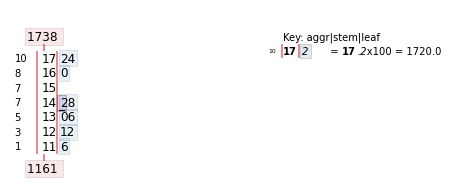

In [1]:
import pandas as pd
import stemgraphic

x = [1161,1206,1478,1300,1604,1725,1361,1422,1221,1738]
stemgraphic.stem_graphic(x, scale = 100)

In [2]:
import pandas as pd
df = pd.read_excel("survey.xls")
df

,Name,Nationality,Sex,Age,Handedness
0,Abhinav,India,Male,21,Right
1,Pragati,India,Female,18,Right
2,Varun,USA,Male,22,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [3]:
pd.crosstab(df.Nationality,df.Handedness)

Handedness,Left,Right
Nationality,,
Bangadesh,2,0
China,2,1
India,2,3
USA,1,1


In [4]:
pd.crosstab(df.Sex,df.Handedness)

Handedness,Left,Right
Sex,,
Female,2,2
Male,5,3


In [5]:
pd.crosstab(df.Sex,df.Handedness, margins=True)

Handedness,Left,Right,All
Sex,,,
Female,2,2,4
Male,5,3,8
All,7,5,12


In [6]:
pd.crosstab(df.Sex, [df.Handedness,df.Nationality], margins=True)

Handedness       Left                 Right           All
Nationality Bangadesh China India USA China India USA    
Sex                                                      
Female              1     1     0   0     1     1   0   4
Male                1     1     2   1     0     2   1   8
All                 2     2     2   1     1     3   1  12

In [7]:
pd.crosstab(df.Sex, df.Handedness, normalize='index')

Handedness,Left,Right
Sex,,
Female,0.500,0.500
Male,0.625,0.375


In [8]:
import numpy as np
pd.crosstab(df.Sex, df.Handedness, values=df.Age, aggfunc=np.average)

Handedness,Left,Right
Sex,,
Female,44.5,35.000000
Male,31.2,26.666667


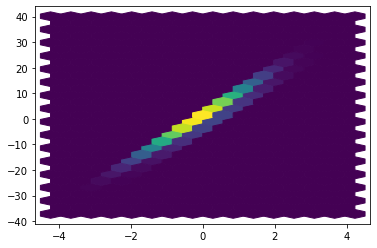

In [10]:
import matplotlib.pyplot as plt
import numpy as np
 
x = np.random.normal(size=100000)
y = (x *9 + np.random.normal(size=100000))
 
plt.hexbin(x, y, gridsize=(15,15) )
plt.show()

In [11]:
import pandas as pd
import scipy.stats as ss
df=pd.read_csv('adult.csv')

In [12]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [13]:
corr=ss.pearsonr(df['age'],df['hours-per-week'])

In [14]:
print("Pearsons Correlation is ",corr)

Pearsons Correlation is  (0.07155833852698289, 1.8002403626482315e-56)


In [15]:
corr1=ss.pearsonr(df['age'],df['educational-num'])
print("Pearsons Correlation is ",corr1)

Pearsons Correlation is  (0.030940375874514033, 7.955032710123876e-12)


In [16]:
corr2=ss.spearmanr(df['age'],df['hours-per-week'])  
print("Spearmans Correlation is ",corr2)

Spearmans Correlation is  SpearmanrResult(correlation=0.1466042624502149, pvalue=9.212956408264411e-233)


In [23]:
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np

In [24]:
cars = sns.load_dataset('mpg')
cars.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [28]:
cars.groupby('origin').cylinders.value_counts()


origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: cylinders, dtype: int64

In [29]:
(cars
 .groupby('origin')
 .cylinders
 .value_counts()
 .unstack()
 .fillna(0)
)

cylinders,3,4,5,6,8
origin,,,,,
europe,0.0,63.0,3.0,4.0,0.0
japan,4.0,69.0,0.0,6.0,0.0
usa,0.0,72.0,0.0,74.0,103.0


In [30]:
origin_cyl = (
    cars
    .groupby('origin')
    .cylinders
    .value_counts()
    .unstack()
    .fillna(0)
)

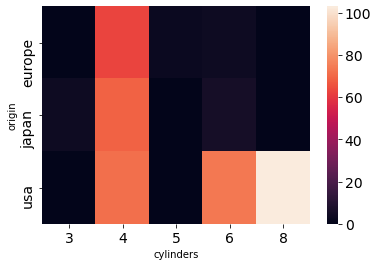

In [31]:
sns.heatmap(origin_cyl);


In [25]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [26]:
xlabels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']
ylabels = ['Coffee', 'Juice', 'Soda', 'Tea']

orders = np.array([[44, 31, 50, 41, 30], 
                   [21, 12, 28, 38, 35],
                   [15, 18, 20, 14, 12],
                   [38, 29, 39, 26, 11]]
                 )

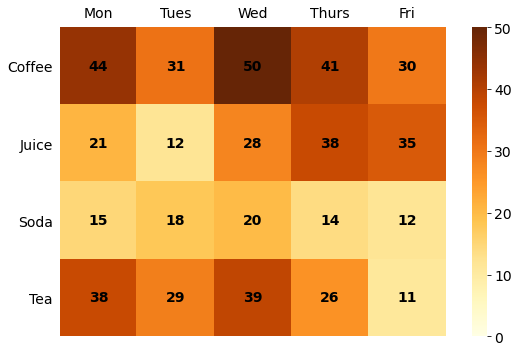

In [27]:
plt.figure(figsize=(8,5))
sns.heatmap(orders, 
            cmap='YlOrBr',
            vmin=0,
            xticklabels=xlabels,
            yticklabels=ylabels,
            annot=True,
            square=True,
            annot_kws={'fontsize':14, 'fontweight': 'bold', 'color': 'black'}
           )
plt.yticks(rotation=0)
plt.tick_params(
    which='both',      
    bottom=False,      
    left=False,      
    labelbottom=False,
    labeltop=True) 
plt.tight_layout();

In [ ]:
# Python code to demonstrate the
# use of numpy.cov
import numpy as np

x = [1.23, 2.12, 3.34, 4.5]

y = [2.56, 2.89, 3.76, 3.95]

# find out covariance with respect columns
cov_mat = np.stack((x, y), axis = 0)

print(np.cov(cov_mat))
